# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[int(num_test/2):], newsgroups_test.target[int(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:int(num_test/2)], newsgroups_test.target[:int(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [4]:
def P1(num_examples=5):
    for i in range(num_examples):
        print("------------------------------------------------------")
        print("\nThe number %d text message in training dataset:\n" %(i+1) , train_data[i])
        print("\nThe label of the number %d text is:" %(i+1), newsgroups_train.target_names[train_labels[i]])

P1(2)

------------------------------------------------------

The number 1 text message in training dataset:
 Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

The label of the number 1 text is: comp.graphics
------------------------------------------------------

The number 2 text message in training dataset:
 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a 

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [5]:
def P2():
    ## 2.a Check the training set vocabulary matrix created
    ## by CountVectorizer class and fit_transform method
    cv1 = CountVectorizer()
    train_vocab = cv1.fit_transform(train_data)
    print("\n---2.a---")
    print("Number of training set vocabulary (features):", len(cv1.get_feature_names()))
    print("The size of the training set:", train_vocab.shape[0])
    print("Avg. number of non-zero features per example:",
          round(train_vocab.nnz/train_vocab.shape[0],2))
    print("Fraction of the entries in the matrix are non-zero:",
          round(train_vocab.nnz/(train_vocab.shape[0]*train_vocab.shape[1]),6))
    
    ## 2.b First and last word in the features (alphabatically ordered)
    print("\n---2.b---")    
    print("The first feature:", cv1.get_feature_names()[0],
          ", The last feature:", cv1.get_feature_names()[len(cv1.get_feature_names())-1])
    
    ## 2.c Specify vocabulary to "atheism", "graphics", "space", "religion"
    cv2 = CountVectorizer(vocabulary=["atheism", "graphics", "space", "religion"])
    train_vocab2 = cv2.fit_transform(train_data)
    print("\n---2.c---")    
    print("The shape of the training set when vocabulary is specified", train_vocab2.shape)
    print("Avg. number of non-zero features per example:",
          round(train_vocab2.nnz/train_vocab2.shape[0],2))
    
    ## 2.d Fit with bigram and trigram characters
    cv3 = CountVectorizer(analyzer="char", ngram_range=(2,3))
    train_vocab3 = cv3.fit_transform(train_data)
    print("\n---2.d---")
    print("Number of training set vocabulary (bigram and trigram):", len(cv3.get_feature_names()))
    print("The size of the training set:", train_vocab3.shape[0])
    print("Avg. number of non-zero features per example:",
          round(train_vocab3.nnz/train_vocab3.shape[0],2))
    print("Fraction of the entries in the matrix are non-zero:",
          round(train_vocab3.nnz/(train_vocab3.shape[0]*train_vocab3.shape[1]),6))    
    
    ## 2.e Prune words which appear in less than 10 docs
    print("\n---2.e---")    
    cv4 = CountVectorizer(min_df=10)
    train_vocab4 = cv4.fit_transform(train_data)
    print("Number of training set vocabulary (features):", len(cv4.get_feature_names()))
    
    ## 2.f Compare dev vocab with train vocab
    print("\n---2.f---")
    cv5 = CountVectorizer()
    dev_vocab = cv5.fit_transform(dev_data)
    print("Number of dev set vocabulary:", len(cv5.get_feature_names()))  
    dev_in_train = set(cv5.get_feature_names()).intersection(cv1.get_feature_names())
    print("Number of dev vocabs found in training set:", len(dev_in_train))
    print("Fraction of dev elements missing from training vocab:", 
         round((len(cv5.get_feature_names())-len(dev_in_train))/len(cv5.get_feature_names()),6))
    
P2()


---2.a---
Number of training set vocabulary (features): 26879
The size of the training set: 2034
Avg. number of non-zero features per example: 96.71
Fraction of the entries in the matrix are non-zero: 0.003598

---2.b---
The first feature: 00 , The last feature: zyxel

---2.c---
The shape of the training set when vocabulary is specified (2034, 4)
Avg. number of non-zero features per example: 0.27

---2.d---
Number of training set vocabulary (bigram and trigram): 35478
The size of the training set: 2034
Avg. number of non-zero features per example: 684.19
Fraction of the entries in the matrix are non-zero: 0.019285

---2.e---
Number of training set vocabulary (features): 3064

---2.f---
Number of dev set vocabulary: 16246
Number of dev vocabs found in training set: 12219
Fraction of dev elements missing from training vocab: 0.247876


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [23]:
def P3(k_list, alphas, lamdas):
    cv = CountVectorizer()
    train_vocab = cv.fit_transform(train_data)
    dev_vocab = cv.transform(dev_data)
    
    print("\n---K Nearest Neighbor---")
    
    ## K Nearest Neighbor with default K = 5
    knn = KNeighborsClassifier()
    knn.fit(train_vocab, train_labels)
    y_pred = knn.predict(dev_vocab)
    print("The F1 Score for K=5 K Nearest Neighbor model is",
          round(metrics.f1_score(dev_labels, y_pred, average='micro'),2))
    
    ## Use grid search to find the optimal K value
    clf = GridSearchCV(estimator=knn, param_grid=k_list)
    clf.fit(train_vocab, train_labels)
    print("Best K =", clf.best_estimator_.n_neighbors,
          ", Best score =", round(clf.best_score_,2))
    
    ## F1 score for the optimal K value 150
    knn = KNeighborsClassifier(clf.best_estimator_.n_neighbors)
    knn.fit(train_vocab, train_labels)
    y_pred = knn.predict(dev_vocab)
    print("The F1 Score for K=150 K Nearest Neighbor model is",
          round(metrics.f1_score(dev_labels, y_pred, average='micro'),2))
    
    print("\n---Multinomial Naive Bayes---")
    
    ## Grid search of alpha for Multinomial Naive Bayes model
    mnb = MultinomialNB()
    clf = GridSearchCV(estimator=mnb, param_grid=alphas)
    clf.fit(train_vocab, train_labels)
    print("Best alpha =", clf.best_estimator_.alpha,
          ", Best score =", round(clf.best_score_,2))
    
    ## The F1 score for Multinomial Naive Bayes model with best alpha value 
    mnb = MultinomialNB(alpha=clf.best_estimator_.alpha)
    mnb.fit(train_vocab, train_labels)
    y_pred = mnb.predict(dev_vocab)
    print("The F1 Score for alpha=0.005 MultinomialNB model is",
          round(metrics.f1_score(dev_labels, y_pred, average='micro'),2))    
    
    print("\n---Logistic Regression---") 
    
    ## Grid search of C for Logistics Regression model 
    lr = LogisticRegression(penalty="l2")
    clf = GridSearchCV(estimator=lr, param_grid=lamdas)
    clf.fit(train_vocab, train_labels)
    print("Best C =", clf.best_estimator_.C,
          ", Best score =", round(clf.best_score_,2))

    ## The F1 score for Logistic Regression model with best C value 
    lr = LogisticRegression(penalty="l2", C=clf.best_estimator_.C)
    lr.fit(train_vocab, train_labels)
    y_pred = lr.predict(dev_vocab)
    print("The F1 Score for C=0.5 Logistic Regression model is",
          round(metrics.f1_score(dev_labels, y_pred, average='micro'),2))
    
    ## Inspect weights
    weight_matrix = np.zeros((len(lamdas["C"]),len(lr.coef_)), dtype=np.int)
    for row in range(len(lamdas["C"])):
        lr = LogisticRegression(penalty="l2", C=lamdas["C"][row])
        lr.fit(train_vocab, train_labels)
        for col in range(len(lr.coef_)):
            weight_matrix[row,col] = np.sum(np.square(lr.coef_[col]))
    print("The weight matrix of different C for each class: \n")
    print("The categories:",categories)
    print("and the C values:", lamdas["C"])
    print(weight_matrix)
            
        
    
    
k_list = {"n_neighbors" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                           15, 20, 25, 30, 40, 50, 70, 80,
                           100, 125, 150, 200, 250, 300,
                           400, 500, 1000]}
alphas = {"alpha" : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}


lamdas = {"C" : [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0]}

P3(k_list, alphas, lamdas)


---K Nearest Neighbor---
The F1 Score for K=5 K Nearest Neighbor model is 0.42
Best K = 150 , Best score = 0.45
The F1 Score for K=150 K Nearest Neighbor model is 0.44

---Multinomial Naive Bayes---
Best alpha = 0.005 , Best score = 0.83
The F1 Score for alpha=0.005 MultinomialNB model is 0.78

---Logistic Regression---
Best C = 0.5 , Best score = 0.77
The F1 Score for C=0.5 Logistic Regression model is 0.71
The weight matrix of different C for each class: 

The categories: ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
and the C values: [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0]
[[  2   2   2   2]
 [ 27  24  27  23]
 [102  83  98  88]
 [167 130 157 145]
 [422 322 389 378]
 [586 448 537 530]
 [780 603 721 722]]


ANSWER:

a. Many of the vocabulary 

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [84]:
def P4():
    ## Logistic Regression with training vectorized in words
    cv = CountVectorizer()
    train_vocab = cv.fit_transform(train_data)
    lr = LogisticRegression(penalty="l2", C=0.5)
    lr.fit(train_vocab, train_labels)
    find_max_weights(lr,cv)
    
    ## Logistic Regression with training vectorized in bigram words
    cv_bi = CountVectorizer(ngram_range=(2, 2),analyzer="word")
    train_vocab_bi = cv_bi.fit_transform(train_data)
    lr2 = LogisticRegression(penalty="l2", C=0.5)
    lr2.fit(train_vocab_bi, train_labels)
    find_max_weights(lr2,cv_bi)    
    
    
def find_max_weights(lr,cv):
    """
    This function takes in a logistic regression model
    and prints out a matrix which consists of the top
    5 weights/features of each category.
    Different CountVectorizer can be specified. E.g. 
    unigram, bigram etc.
    """
    max_weights = np.zeros((len(lr.coef_)*5,len(lr.coef_)))
    feature_index = []
    
    for category in range(len(lr.coef_)):
        for i in sorted(range(len(lr.coef_[category])), key=lambda i: lr.coef_[category][i])[-5:]:
            feature_index.append(i)
            
    for i in range(len(lr.coef_)*5):
        for j in range(len(lr.coef_)):
            max_weights[i,j] = lr.coef_[j][feature_index[i]]
    features = [cv.get_feature_names()[i] for i in feature_index]
    print("\nThe categories are", categories)
    print("\nThe features with highest weights are", features)
    print("\n", max_weights)
    
P4()


The categories are ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

The features with highest weights are ['deletion', 'atheism', 'religion', 'bobby', 'atheists', 'computer', '3d', 'file', 'image', 'graphics', 'spacecraft', 'launch', 'nasa', 'orbit', 'space', 'order', 'fbi', 'blood', 'christian', 'christians']

 [[ 0.72341882 -0.24935803 -0.27242277 -0.27043152]
 [ 0.79399628 -0.35095249 -0.36716864 -0.3769769 ]
 [ 0.79827254 -0.50836845 -0.65888752 -0.05061357]
 [ 0.82368865 -0.19130294 -0.28656016 -0.38714194]
 [ 0.8321225  -0.09345567 -0.26711454 -0.63759547]
 [ 0.07054416  0.84457485 -0.5695169  -0.39613849]
 [-0.30364017  0.94182412 -0.57108984 -0.31758479]
 [-0.27545274  1.05970348 -0.68274538 -0.50618219]
 [-0.46868414  1.11701447 -0.6718851  -0.38106895]
 [-0.64120399  1.62593558 -1.10311723 -0.62630344]
 [-0.29741781 -0.32202591  0.7371317  -0.29181922]
 [-0.37646352 -0.39678573  0.78375239 -0.28085721]
 [-0.46490784 -0.41040026  0.85164892 -0.40157688]
 [

ANSWER:

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [59]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
    ## lowercase all the letters
    s = s.lower()
    ## replace underscore with blank
    s = s.replace("_", " ")
    ## split number and character sequences and reconcat into a text
    str_list = re.findall(r'[A-Za-z]+|\d+', s)
    s = ' '.join(str(elem) for elem in str_list)
    return s
    
def P5():
    ## create normalized text training data
    train_data_normalized = []
    for text in range(len(train_data)):
        s = better_preprocessor(train_data[text])
        train_data_normalized.append(s)
    ## create normalized text dev data
    dev_data_normalized = []
    for text in range(len(dev_data)):
        s = better_preprocessor(dev_data[text])
        dev_data_normalized.append(s)
    
    ## apply count vectorizer on both normalized and original text data
    cv1 = CountVectorizer()
    train_vocab_normalized = cv1.fit_transform(train_data_normalized)
    dev_vocab_normalized = cv1.transform(dev_data_normalized)
    cv2 = CountVectorizer()
    train_vocab = cv2.fit_transform(train_data)
    dev_vocab = cv2.transform(dev_data)
    print("Number of features without normalizing:", len(cv2.get_feature_names()))
    print("Number of features with normalizing:", len(cv1.get_feature_names()))
    
    ## Logistic regression model
    lr1 = LogisticRegression(penalty="l2",C=0.5)
    lr1.fit(train_vocab_normalized, train_labels)
    y_pred1 = lr1.predict(dev_vocab_normalized) 
    lr2 = LogisticRegression(penalty="l2",C=0.5)
    lr2.fit(train_vocab, train_labels)
    y_pred2 = lr2.predict(dev_vocab) 
    print("F1 score of normalized text", 
          round(metrics.f1_score(dev_labels, y_pred1, average='micro'),2))
    print("F1 score of unnormalized text", 
          round(metrics.f1_score(dev_labels, y_pred2, average='micro'),2))

P5()

Number of features without normalizing: 26879
Number of features with normalizing: 25704
F1 score of normalized text 0.71
F1 score of unnormalized text 0.71


ANSWER:

By normalizing text, the number of features reduce by 10k, although not a big amount. The f1 score has not improved by that. To enhance the score, replacing sequence of numbers with single number token may help.

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]


Logistic regression with L1 penalty regularization
Number of features (across labels): 107516
Number of features (across labels) with non-zero weight: 1202

Logistic regression with L2 penalty regularization
Number of features (across labels): 107516
Number of features (across labels) with non-zero weight: 107516

Number of features that at least has 1 nonzero weight: 724
The accuracy with only nonzero weights under C=0.5 is 0.67

The C values are [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0] with each yields these different number of features: [3, 18, 213, 743, 1386, 2165, 2634, 4091, 5824, 7804]


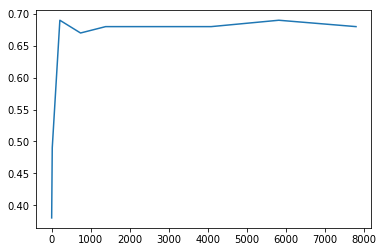

In [38]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    cv = CountVectorizer()
    train_vocab = cv.fit_transform(train_data)
    dev_vocab = cv.transform(dev_data)
    
    ## L1 penalty
    lr_l1 = LogisticRegression(penalty="l1", C=0.5, tol=0.01)
    lr_l1.fit(train_vocab, train_labels)
    print("\nLogistic regression with L1 penalty regularization")
    print("Number of features (across labels):", len(lr_l1.coef_[0])*len(lr_l1.coef_))
    print("Number of features (across labels) with non-zero weight:", np.sum((lr_l1.coef_ != 0)*1))
    
    ## L2 penalty
    lr_l2 = LogisticRegression(penalty="l2", C=0.5, tol=0.01)
    lr_l2.fit(train_vocab, train_labels)
    print("\nLogistic regression with L2 penalty regularization")
    print("Number of features (across labels):", len(lr_l2.coef_[0])*len(lr_l2.coef_))
    print("Number of features (across labels) with non-zero weight:", np.sum((lr_l2.coef_ != 0)*1))
    
    ## L2 with only non-zero weight features given by L1 model
    index_nonzero = []
    for i in range(len(lr_l1.coef_[0])):
        if lr_l1.coef_[0,i] != 0 or lr_l1.coef_[1,i] != 0 or lr_l1.coef_[2,i] != 0 or lr_l1.coef_[3,i] != 0:
            index_nonzero.append(i)
    print("\nNumber of features that at least has 1 nonzero weight:", len(index_nonzero))
    train_vocab_nonzero = train_vocab.toarray()[:,index_nonzero]
    dev_vocab_nonzero = dev_vocab.toarray()[:,index_nonzero]
    lr_l2_nonzero = LogisticRegression(penalty="l2", C=0.5, tol=0.01)
    lr_l2_nonzero.fit(train_vocab_nonzero, train_labels)
    
    y_pred = lr_l2_nonzero.predict(dev_vocab_nonzero)
    print("The accuracy with only nonzero weights under C=0.5 is",
          round(metrics.accuracy_score(dev_labels, y_pred),2))
    
    ## Plot different number of features generated by different C value 
    ## v.s. the accuracy given by the retrained model
    C = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0]
    accuracy = []
    feature_num = []
    for c_val in C:
        lr = LogisticRegression(penalty="l1", C=c_val, tol=0.01)
        lr.fit(train_vocab, train_labels)
        index_nonzero = []
        for i in range(len(lr.coef_[0])):
            if lr.coef_[0,i] != 0 or lr.coef_[1,i] != 0 or lr.coef_[2,i] != 0 or lr.coef_[3,i] != 0:
                index_nonzero.append(i)
        feature_num.append(len(index_nonzero))
        train_vocab_nonzero = train_vocab.toarray()[:,index_nonzero]
        dev_vocab_nonzero = dev_vocab.toarray()[:,index_nonzero]
        lr2 = LogisticRegression(penalty="l2", C=c_val, tol=0.01)
        lr2.fit(train_vocab_nonzero, train_labels)
        y_pred = lr2.predict(dev_vocab_nonzero)
        accuracy.append(round(metrics.accuracy_score(dev_labels, y_pred),2))
    
    print("\nThe C values are", C,
          "with each yields these different number of features:", feature_num)
    plt.plot(feature_num,accuracy)
    plt.show()


P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [37]:
def P7():
    ## CountVectorizer
    cv = CountVectorizer()
    train_vocab_cv = cv.fit_transform(train_data)
    dev_vocab_cv = cv.transform(dev_data)
    print("Shape of training vocab from CountVectorizer", train_vocab_cv.shape)
    
    ## TfidfVectorizer
    tv = TfidfVectorizer()
    train_vocab_tv = tv.fit_transform(train_data)
    dev_vocab_tv = tv.transform(dev_data)
    print("Shape of training vocab from TfidfVectorizer", train_vocab_tv.shape)
    
    ## Train logistic regression model
    lr = LogisticRegression(C=100.0)
    lr.fit(train_vocab_tv, train_labels)
    y_pred = lr.predict(dev_vocab_tv)
    y_prob = lr.predict_proba(dev_vocab_tv)
    print("Accuracy of the logistic regression model is", 
          round(metrics.accuracy_score(dev_labels, y_pred),2))
    
    ## Compute R for each document and get the top 3
    R = []
    for i in range(y_prob.shape[0]):
        R.append(np.max(y_prob[i]) / y_prob[i,dev_labels[i]])
    top_R_index = sorted(range(len(R)), key=lambda i: R[i], reverse=True)[:3]
    print("top R index", top_R_index)
    for i in range(3):
        print("-----------------------------------------------------------------")
        print("\nThe", i+1, "biggest R value:", round(R[top_R_index[i]],2))
        y = y_prob[top_R_index[i]]
        print("The predicted label is", 
              newsgroups_train.target_names[sorted(range(len(y)), key=lambda i: y[i], reverse=True)[0]])
        print("The correct label is", newsgroups_train.target_names[dev_labels[top_R_index[i]]] )
        print("Document", top_R_index[i]+1, ":\n", dev_data[top_R_index[i]] )
    
P7()


Shape of training vocab from CountVectorizer (2034, 26879)
Shape of training vocab from TfidfVectorizer (2034, 26879)
Accuracy of the logistic regression model is 0.76
top R index [215, 665, 607]
-----------------------------------------------------------------

The 1 biggest R value: 929.36
The predicted label is comp.graphics
The correct label is talk.religion.misc
Document 216 :
 I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-prof

ANSWER:

If the prediction and the correct label matches, the R value should be 1 since it's taking the ratio of max probability and correct label probability. Given a large R, it tells us that the prediction is putting high probability on the wrong label and very less probability on the true label, thus this is showing us the predictions that were way off. 

The 3 examples where R value is largest were printed. The first 2 were predicted as computer gaphics whilst the true labels gave religion as their category. The last one was predicted as religion whilst the correct label is atheism. The first 2 documents were likely predicted as computer related topics since the texts contains words such as Microsoft, ASCII and so on, whilst they are actual talking about religion resources online. 

The model is making this mistake most likely because it was giving certain key words a very high weight, thus as long as they occur, the prediction is biased towards those specific labels no matter what the other contect or relationship between words look like. One way that may fix it is by extracting n gram words, thus considers relationship or ordering between sequence of words. Additionally, adding a higher regularization may help reduce the high weight on these specific words.



(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance